# LeNet on MNIST with TensorFlow/Keras

This notebook implements the classic LeNet architecture on the MNIST digit dataset, using `tanh` activations as in the original paper.

## 1. Import the necessary libraries

In [1]:
from tensorflow import keras
from keras.layers import Dense, Flatten, AveragePooling2D, Conv2D
from keras.datasets import mnist
from keras import Sequential
from keras.optimizers import Adam

import numpy as np

2025-05-18 13:35:57.353215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 13:35:57.368162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747555557.382863    9768 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747555557.387391    9768 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747555557.402805    9768 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 2. Load and Normalize MNIST Data

In [2]:
# Load MNIST data (images and labels)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] for better convergence
X_train, X_test = X_train / 255.0, X_test / 255.0

## 3. Reshape Data for CNN

In [3]:
# Reshape to (samples, height, width, channels)
# MNIST images are grayscale, so channels=1
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

## 4. LeNet Architecture with tanh activation

### 4.1. Model with tanh Activation

In [4]:
# Build LeNet using Keras Sequential API
model = Sequential()

# First convolutional layer: 6 filters, 5x5 kernel, tanh activation
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
# Average pooling
model.add(AveragePooling2D(pool_size=(2,2), padding='valid', strides=2))

# Second convolutional layer: 16 filters, 5x5 kernel, tanh activation
model.add(Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'))
# Average pooling
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Fully connected layers with tanh activation
model.add(Dense(256, activation='tanh'))
model.add(Dense(84, activation='tanh'))

# Output layer: 10 classes (digits 0-9), softmax activation
model.add(Dense(10, activation='softmax'))

/home/harry/miniconda3/envs/TF/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747555561.142220    9768 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


### 4.2 Model Summary

In [5]:
# Print the model architecture and parameter count
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

### 4.3 Compile the Model

In [6]:
# Compile with Adam optimizer and sparse categorical crossentropy loss
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 4.4 Train the Model

In [7]:
from keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100


I0000 00:00:1747555563.279584    9852 service.cc:152] XLA service 0x7f9554005960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747555563.279619    9852 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-05-18 13:36:03.299224: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747555563.455746    9852 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-18 13:36:05.203486: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_500', 4 bytes spill stores, 4 bytes spill loads

2025-05-18 13:36:05.357445: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

 53/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5705 - loss: 1.4612

I0000 00:00:1747555569.991052    9852 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.6531

2025-05-18 13:36:13.187941: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76', 4 bytes spill stores, 4 bytes spill loads

2025-05-18 13:36:13.379525: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76_0', 8 bytes spill stores, 8 bytes spill loads

2025-05-18 13:36:13.623052: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_81', 4 bytes spill stores, 4 bytes spill loads

2025-05-18 13:36:13.737027: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_81', 224 bytes spill stores, 112 bytes spill loads

2025-05-18 13:36:13.790807: I external/local_xla/x

375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8142 - loss: 0.6494 - val_accuracy: 0.9392 - val_loss: 0.1972
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9502 - loss: 0.1678 - val_accuracy: 0.9657 - val_loss: 0.1186
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.1050 - val_accuracy: 0.9726 - val_loss: 0.0925
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9774 - loss: 0.0733 - val_accuracy: 0.9757 - val_loss: 0.0829
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9792 - val_loss: 0.0695
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9879 - loss: 0.0410 - val_accuracy: 0.9813 - val_loss: 0.0641
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9817 - val_loss: 0.0609
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9925 - loss: 0.0258 - val_accuracy: 0.9

### 4.5 Evaluate on Test Data

In [8]:
# Evaluate the trained model on test set
model.evaluate(X_test, y_test)

2025-05-18 13:36:58.103901: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_81', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9806 - loss: 0.0597


[0.05238042771816254, 0.9842000007629395]

### 4.6 Plot Training History

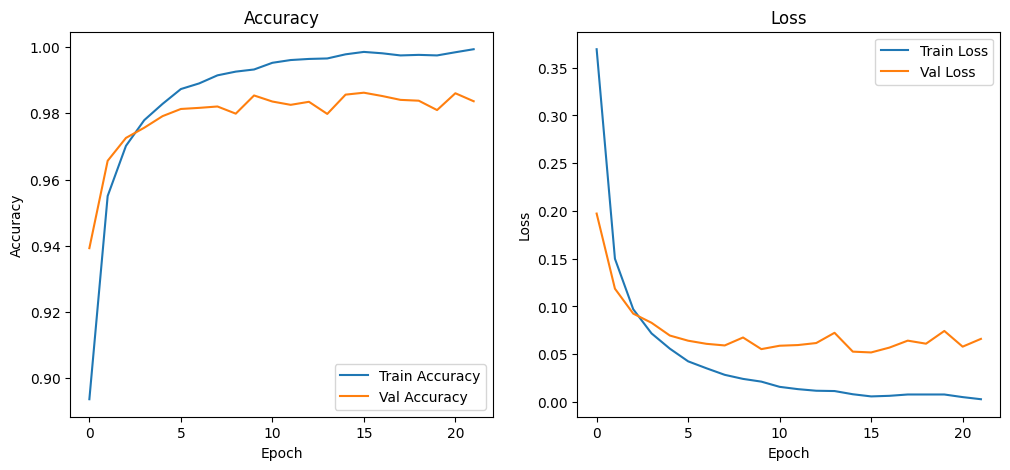

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 5. LeNet Architecture with ReLU activation

### 5.1. Model with tanh Activation

In [10]:
# Build LeNet using Keras Sequential API
model2 = Sequential()

# First convolutional layer: 6 filters, 5x5 kernel, ReLU activation
model2.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
# Average pooling
model2.add(AveragePooling2D(pool_size=(2,2), padding='valid', strides=2))

# Second convolutional layer: 16 filters, 5x5 kernel, ReLU activation
model2.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='valid'))
# Average pooling
model2.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten the output to feed into dense layers
model2.add(Flatten())

# Fully connected layers with ReLU activation
model2.add(Dense(256, activation='relu'))
model2.add(Dense(84, activation='relu'))

# Output layer: 10 classes (digits 0-9), softmax activation
model2.add(Dense(10, activation='softmax'))

### 5.2 Model Summary

In [11]:
# Print the model architecture and parameter count
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

### 5.3 Compile the Model

In [12]:
# Compile with Adam optimizer and sparse categorical crossentropy loss
model2.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 5.4 Train the Model

In [13]:
from keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Fit the model
history2 = model2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100


2025-05-18 13:37:04.569448: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_292_0', 132 bytes spill stores, 132 bytes spill loads

2025-05-18 13:37:04.699744: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_292', 8 bytes spill stores, 8 bytes spill loads

2025-05-18 13:37:04.968011: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_292_0', 124 bytes spill stores, 124 bytes spill loads

2025-05-18 13:37:05.403535: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_504', 128 bytes spill stores, 232 bytes spill loads

2025-05-18 13:37:05.477711: I extern

373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7671 - loss: 0.7787

2025-05-18 13:37:11.945853: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82_0', 144 bytes spill stores, 144 bytes spill loads

2025-05-18 13:37:12.200924: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82_0', 136 bytes spill stores, 136 bytes spill loads

2025-05-18 13:37:12.342176: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82', 124 bytes spill stores, 124 bytes spill loads



375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7680 - loss: 0.7757 - val_accuracy: 0.9502 - val_loss: 0.1599
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9570 - loss: 0.1380 - val_accuracy: 0.9713 - val_loss: 0.0944
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9729 - loss: 0.0888 - val_accuracy: 0.9754 - val_loss: 0.0803
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9794 - loss: 0.0670 - val_accuracy: 0.9772 - val_loss: 0.0743
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9840 - loss: 0.0512 - val_accuracy: 0.9795 - val_loss: 0.0634
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9814 - val_loss: 0.0589
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9

### 5.5 Evaluate on Test Data

In [14]:
# Evaluate the trained model on test set
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9815 - loss: 0.0707


[0.05877251550555229, 0.9848999977111816]

### 5.6 Plot Training History

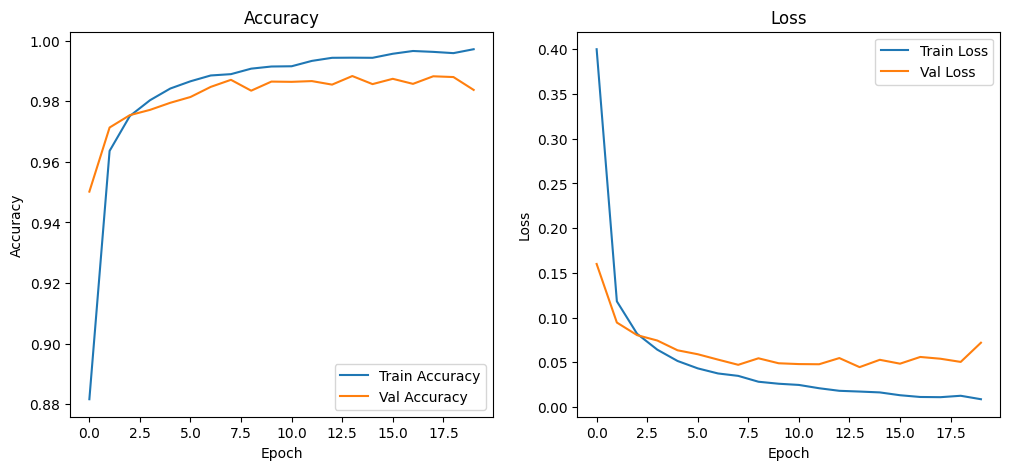

In [15]:
# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()